# Plotting of Optical Constants

`JaxLayerLumos` can accommodate a wide variety of materials.

In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as onp

import jaxlayerlumos.utils_spectra as jll_utils_spectra
import jaxlayerlumos.utils_materials as jll_utils_materials
import jaxlayerlumos.utils_units as jll_utils_units

We list all the materials and the file location.  Additional materials and files can be added by the user by changing the file materials.json() and placing the materials n and k parameters in the `materials` directory.  These materials were downloaded from
the [Refractive Index Database](https://refractiveindex.info/).
The wavelengths are given in microns.


In [2]:
materials_dict, _ = jll_utils_materials.load_json()

for key, value in materials_dict.items():
    print(f"{key}: {value}")

Ag: materials/Ag-Rakic-LD-1998.csv
Air: materials/Air-Peck-1972.csv
Al2O3: materials/Al2O3-Querry-1985.csv
Al: materials/Al-Rakic-LD-1998.csv
aSi: materials/aSi-Pierce-1972.csv
aSi-Zarei: materials/aSi-Zarei-2024.csv
Au: materials/Au-Rakic-LD-1998.csv
AZO-Zarei: materials/AZO-Zarei-2024.csv
BK7: materials/BK7-N-BK7.csv
Cr: materials/Cr-Rakic-LD-1998.csv
cSi: materials/cSi-Schinke-2015.csv
Cu: materials/Cu-Rakic-LD-1998.csv
Fe: materials/Fe-Werner-DFT-2009.csv
FusedSilica: materials/FusedSilica-Malitson-1965.csv
GaAs: materials/GaAs-Rakic-1996.csv
GaInP: materials/GaInP-Schubert-1995.csv
GaP: materials/GaP-Adachi-1989.csv
Ge: materials/Ge-Nunley-2016.csv
InP: materials/InP-Adachi-1989.csv
ITO: materials/ITO-Konig-2014.csv
ITO-Zarei: materials/ITO-Zarei-2024.csv
Mg: materials/Mg-Palm-2018.csv
Mn: materials/Mn-Querry-1987.csv
Ni: materials/Ni-Rakic-LD-1998.csv
Pb: materials/Pb-Werner-DFT-2009.csv
Pd: materials/Pd-Rakic-LD-1998.csv
Pt: materials/Pt-Rakic-LD-1998.csv
Sapphire: materials/Sap

We retrieve the raw data and extraploate the $n$ and $k$ values of a particular wavelengths range, i.e., 280 - 1000 nm.

In [3]:
material = onp.array(['GaInP'])

data_n, data_k = jll_utils_materials.load_material(material[0])
wavelengths_in_nm_n = jll_utils_units.convert_m_to_nm(
    jll_utils_spectra.convert_frequencies_to_wavelengths(data_n[:, 0]))
wavelengths_in_nm_k = jll_utils_units.convert_m_to_nm(
    jll_utils_spectra.convert_frequencies_to_wavelengths(data_k[:, 0]))

print(f'{onp.min(wavelengths_in_nm_n):.4f} nm {onp.max(wavelengths_in_nm_n):.4f} nm')
print(f'{onp.min(wavelengths_in_nm_k):.4f} nm {onp.max(wavelengths_in_nm_k):.4f} nm')

wavelengths = jnp.linspace(280e-9, 1000e-9, 1000)
frequencies = jll_utils_spectra.convert_wavelengths_to_frequencies(wavelengths)
wavelengths_in_nm = jll_utils_units.convert_m_to_nm(wavelengths)

print(f'{onp.min(wavelengths_in_nm):.4f} nm {onp.max(wavelengths_in_nm):.4f} nm')

n_k = jll_utils_materials.get_n_k(material, frequencies)

249.6100 nm 953.9500 nm
249.6100 nm 953.9500 nm
280.0000 nm 1000.0000 nm


/bgfs/pleu/juk139/workspace/JaxLayerLumos/jaxlayerlumos/utils_materials.py:118: UserWarning: Extrapolation detected: Some frequencies are outside the given data range.
  warnings.warn(
/bgfs/pleu/juk139/workspace/JaxLayerLumos/jaxlayerlumos/utils_materials.py:118: UserWarning: Extrapolation detected: Some frequencies are outside the given data range.
  warnings.warn(


This plots the raw data and the extrapolated data.

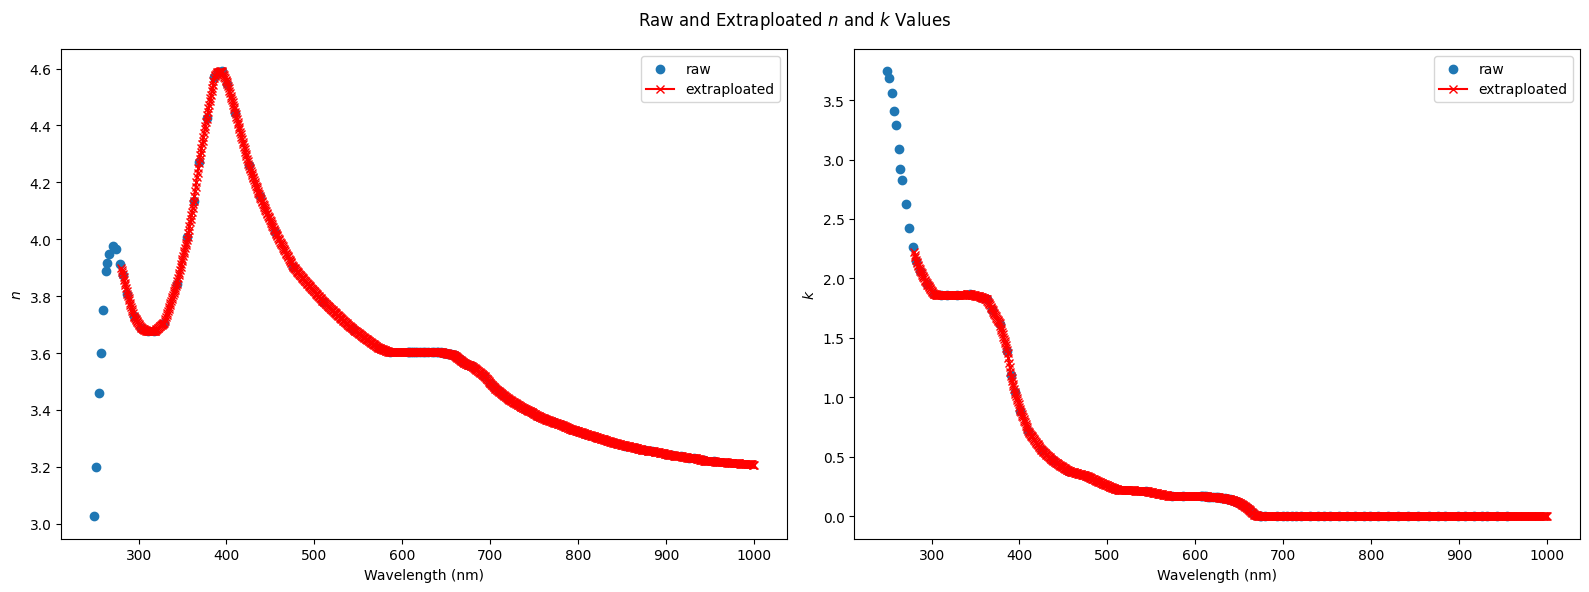

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(wavelengths_in_nm_n, data_n[:, 1], marker='o', label='raw')
ax2.scatter(wavelengths_in_nm_k, data_k[:, 1], marker='o', label='raw')

ax1.plot(wavelengths_in_nm, onp.real(n_k), marker='x', color='r', label='extraploated')
ax2.plot(wavelengths_in_nm, onp.imag(n_k), marker='x', color='r', label='extraploated')

ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('$n$')

ax2.set_xlabel('Wavelength (nm)')
ax2.set_ylabel('$k$')

ax1.legend()
ax2.legend()

fig.suptitle('Raw and Extraploated $n$ and $k$ Values')

plt.tight_layout()
plt.show()